In [1]:
import torch
import torchvision

In [2]:
# DOES NOT WORK
# print("----------------------------------------------------------------")
# print("Converting to pytorch")
# print("----------------------------------------------------------------")
# import onnx
# import onnx2pytorch
# onnx_path = "/home/dherrera/Downloads/test/saved_model.onnx"
# pytorch_path = "/home/dherrera/Downloads/test/saved_model.pt"
# onnx_model = onnx.load(onnx_path)
# pytorch_model = onnx2pytorch.ConvertModel(onnx_model)


In [3]:
from torchvision.models.detection import (
    maskrcnn_resnet50_fpn,
    MaskRCNN_ResNet50_FPN_Weights,
)
from torchvision.models import ResNet50_Weights

model = torchvision.models.detection.maskrcnn_resnet50_fpn(
    weights=MaskRCNN_ResNet50_FPN_Weights,
    progress=True,
    num_classes=None,
    weights_backbone=ResNet50_Weights.IMAGENET1K_V1,
    trainable_backbone_layers=None,
)
model.eval()
model

/home/dherrera/git/zoo_vision/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

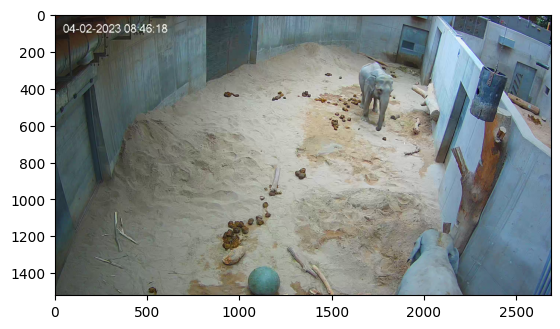

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im = cv2.imread("../data/sample_frame.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = im.astype(np.float32)/255
plt.imshow(im)

In [5]:
imt = torch.permute(torch.from_numpy(im), [2,0,1])
with torch.no_grad():
    predictions=result = model([imt])
assert len(predictions) ==1
predictions = predictions[0]
# x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
# predictions = model(x)  # Returns predictions

In [9]:
display(predictions.keys())
masks = predictions["masks"]
display(predictions["scores"])
display(predictions["boxes"].shape)

dict_keys(['boxes', 'labels', 'scores', 'masks'])

tensor([0.9956, 0.9374, 0.9374, 0.6920, 0.6755, 0.4594, 0.3783, 0.3372, 0.2796,
        0.2741, 0.2467, 0.2224, 0.2210, 0.1669, 0.1629, 0.1445, 0.1294, 0.1172,
        0.1169, 0.1134, 0.0997, 0.0919, 0.0860, 0.0835, 0.0780, 0.0712, 0.0688,
        0.0645, 0.0644, 0.0640, 0.0597, 0.0571, 0.0562, 0.0525, 0.0521, 0.0515,
        0.0513])

torch.Size([37, 4])

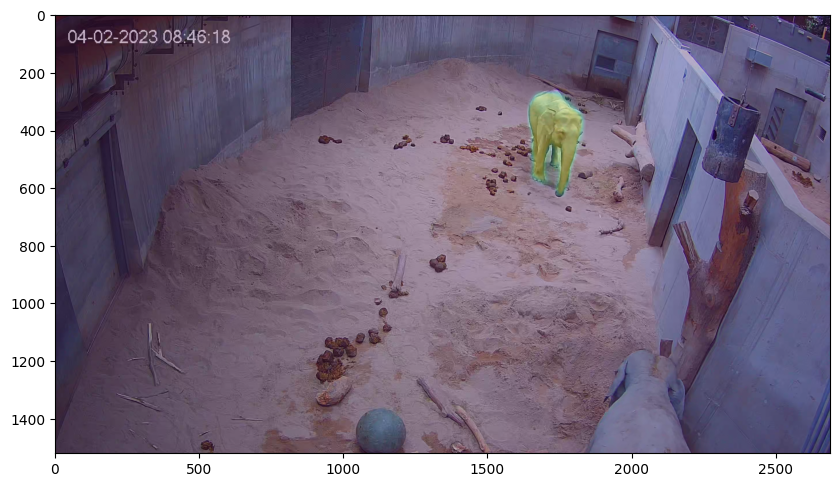

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
ax.imshow(im)
ax.imshow(predictions["masks"][0,0],alpha=0.3)


In [8]:
# traced_module = torch.jit.trace(model, [[imt]])
traced_module = torch.jit.script(model)
traced_module.save("../models/camera0/segmentation/torch.pt")